In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] 
plt.rcParams['axes.unicode_minus'] = False 

In [2]:
label = np.load("../data/ijb/512_label.npy")
_, c1 = np.unique(label, return_counts=True)
label = np.load("../data/ms1m/test_1_label.npy")
_, c2 = np.unique(label, return_counts=True)
label = np.load("../data/ytb_faces/test_label.npy")
_, c3 = np.unique(label, return_counts=True)
c1 = pd.DataFrame(c1, columns=['ijb'])
c2 = pd.DataFrame(c2, columns=['ms1m'])
c3 = pd.DataFrame(c3, columns=['ytb_faces'])

FileNotFoundError: [Errno 2] No such file or directory: '../data/ytb_faces/test_1_label.npy'

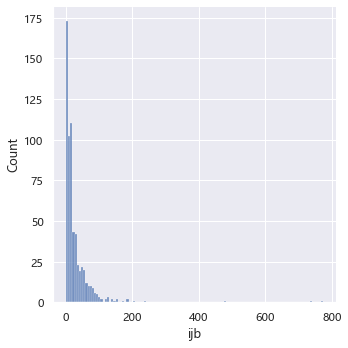

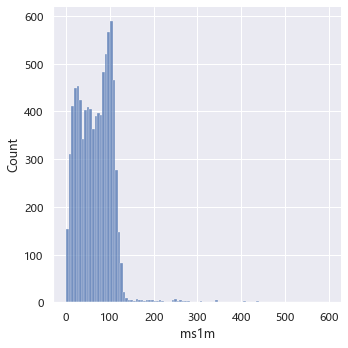

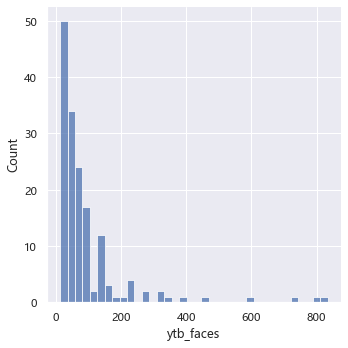

In [18]:
sns.displot(c1, x='ijb')
sns.displot(c2, x='ms1m')
sns.displot(c3, x='ytb_faces')

In [19]:
def plot_dist(knn_path, label_path, name):
    knn = np.load(knn_path)[:, :, 1:]
    label = np.load(label_path)
    nbr, dist = knn[:, 0, :].astype(int), knn[:, 1, :]
    dist[dist<0]=0
    row, col = np.where(dist < 1)

    idx = np.where(label[row] == label[nbr[row, col]])
    row1 = row[idx]
    col1 = col[idx]
    dist1 = dist[row1, col1]

    idx = np.where(label[row] != label[nbr[row, col]])
    row2 = row[idx]
    col2 = col[idx]
    dist2 = dist[row2, col2]

    data = np.concatenate([dist1, dist2])
    data = pd.DataFrame(data, columns=[name])
    data['species'] = ['normal' for _ in range(len(dist1))] + ['noise' for _ in range(len(dist2))]
    sns.displot(data, x=name, hue='species')

In [20]:
plot_dist("../data/ijb/knns/512_k_80.npy", "../data/ijb/512_label.npy", "ijb")
plot_dist("../data/ms1m/knns/test_1_k_80.npy", "../data/ms1m/test_1_label.npy", "ms1m")
plot_dist("../data/ytb_faces/knns/test_k_80.npy", "../data/ytb_faces/test_label.npy", "ytb_faces")